In [2]:
import pandas as pd

In [3]:
# Using the concat method allows you to add additional datasets in the future
# i.e taxi_data = pd.concat([taxi_jan_2019, taxi_feb_2019])
# You would use the taxi_data dataframe for the analysis

taxi_jan_2019 = pd.read_parquet(r'data/yellow_tripdata_2019-01.parquet')
taxi_data = pd.concat([taxi_jan_2019])

## Import Data

In [4]:
print(taxi_data.shape)
taxi_data.head()

(7696617, 19)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN,None
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN,None
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,None
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN,None
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN,None


## Data Exploration

In [6]:
# look at all columns available
# Reference this to the explanation file to decide which columns to keep

taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [8]:
# Reshape the dataframe to the columns needed for the analysis

taxi_data = taxi_data[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 
                       'PULocationID', 'DOLocationID', 'payment_type', 'total_amount']]

In [10]:
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,193,193,2,55.55


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'PULocationID'}>],
       [<Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

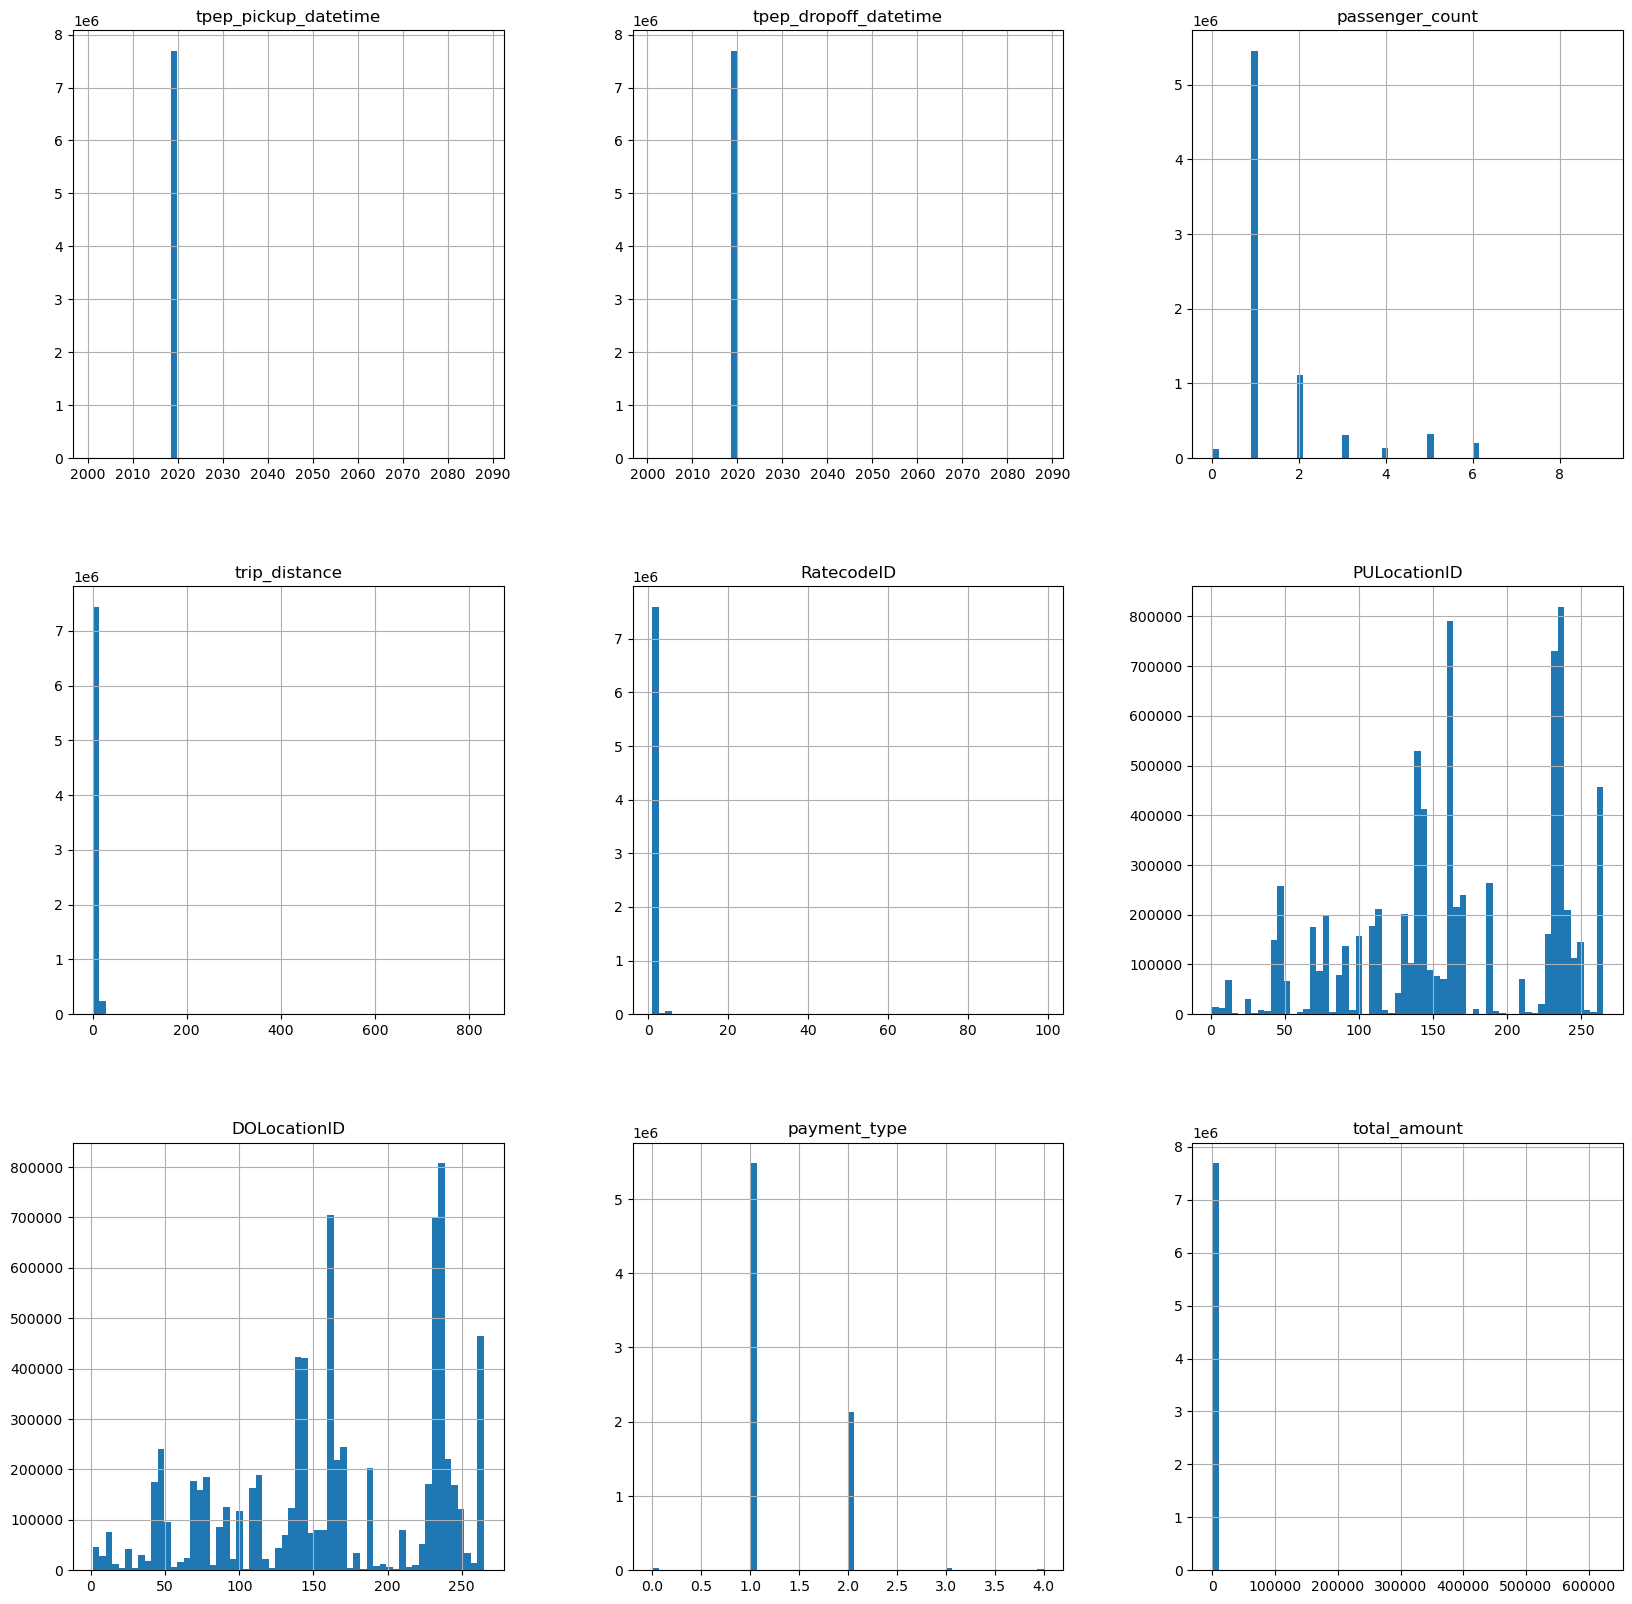

In [11]:
taxi_data.hist(figsize=(20,20), bins=(60))

In [16]:
# We look at the RatecodeID value counts because the his about showed us values up to 100
# It means that there are values in data set up to that amount, but very fiew
# In other words there may be outliers

# Based on the RatecodeID descriptions, this data looks normal. Most are standard fares with a few spanning the rest of the descriptions
# 1= Standard rate
# 2=JFK
# 3=Newark
# 4=Nassau or Westchester
# 5=Negotiated fare
# 6=Group ride

taxi_data['RatecodeID'].value_counts()

RatecodeID
1.0     7430288
2.0      166093
5.0       54570
3.0       11801
4.0        4895
99.0        252
6.0          46
Name: count, dtype: int64

<Axes: xlabel='index', ylabel='total_amount'>

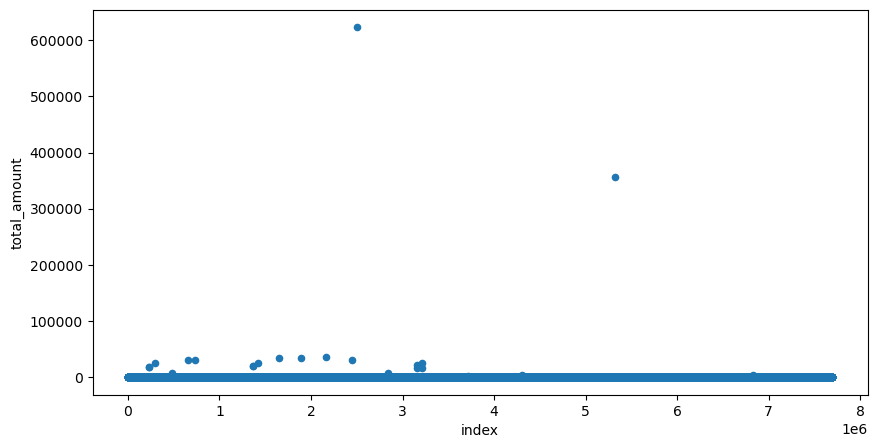

In [17]:
# We see majority of the total_amount is in one range
# We now can look at all values > 1000 to see ehat the majority of the data looks like

taxi_data.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

<Axes: xlabel='index', ylabel='total_amount'>

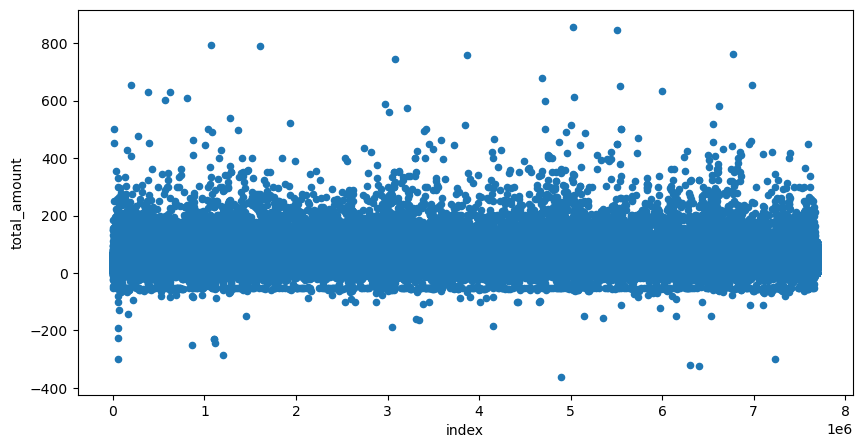

In [19]:
# We see that majority of the total_amounts are less that 1000
# We also see some negative values - We need to decide how to handle these
# This confirms the outliers shown in the scatter above. i.e. + 30000 and + 60000 - We need to decide how to deal with this
taxi_data[taxi_data['total_amount']<1000].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

<h5>Dealing with the high and negative values</h5>

<h5>Negative Values</h5>

(7127, 9)


<Axes: xlabel='index', ylabel='total_amount'>

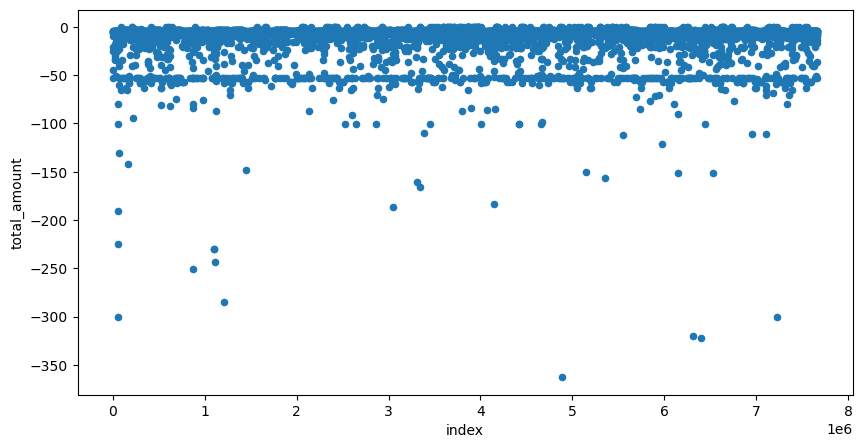

In [25]:
# First get the shape of the data for all negative values
# We do this to see how many negative entries there are.
# Can we delete this from the dataset? There are only 7000 negative entries from 7_000_000 so this is an option
print(taxi_data[taxi_data['total_amount']<0].shape)

# Then plot the data in a scatter
taxi_data[taxi_data['total_amount']<0].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

In [27]:
# Look at a sample of the negative values from the dtataframe
# We see the payment types are 3 and 4

taxi_data[taxi_data['total_amount']<0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
663,2019-01-01 00:32:56,2019-01-01 00:33:35,2.0,0.10,1.0,148,148,3,-3.8
2402,2019-01-01 00:14:18,2019-01-01 00:40:55,1.0,4.13,1.0,170,238,4,-20.3
2541,2019-01-01 00:31:27,2019-01-01 00:42:39,1.0,1.35,1.0,162,234,4,-9.8
2544,2019-01-01 00:45:57,2019-01-01 00:46:07,1.0,0.00,1.0,234,234,4,-3.8
2547,2019-01-01 00:48:35,2019-01-01 00:49:59,1.0,0.16,1.0,234,234,4,-4.3


In [32]:
# Look at the value counts for the payement types of the negative values data
# This confirms that the payment type is mostly 3 and 4

# 1= Credit card
# 2= Cash
# 3= No charge
# 4= Dispute
# 5= Unknown
# 6= Voided trip

# It shows they are 3 - 'No Charge' or 4 'Dispute'

# We can assume that the negative values mostly happens when there is something wrong during the payment process

# We can delete the values with negative values

taxi_data[taxi_data['total_amount']<0]['payment_type'].value_counts()

payment_type
3    4083
4    2667
2     376
1       1
Name: count, dtype: int64

<Axes: >

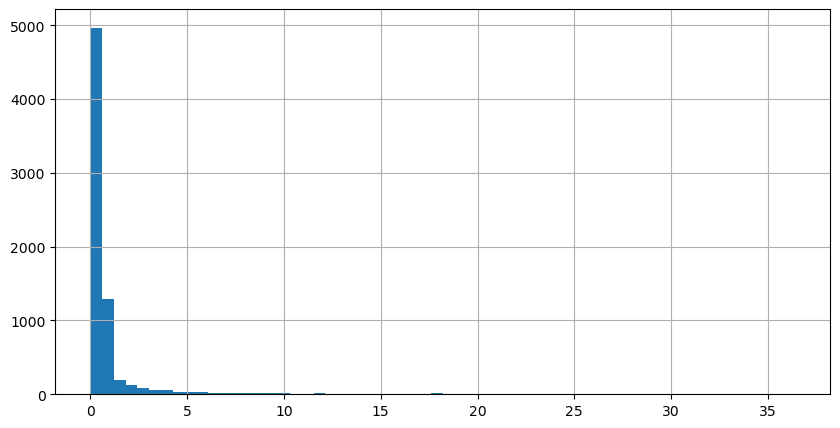

In [34]:
# Look at the trip_distance when the total amount is < 0

# We see most of the trip distances are 0 so we can delete the negative values

taxi_data[taxi_data['total_amount']<0]['trip_distance'].hist(bins=60, figsize=(10,5))

In [37]:
# Look at values where trip distance = 0
# We see less than 2000 values so losing these would also not affect the analysis

print(taxi_data[taxi_data['total_amount']==0].shape)
taxi_data[taxi_data['total_amount']==0].head()

(1643, 9)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
3552,2019-01-01 00:18:46,2019-01-01 00:18:46,1.0,0.0,5.0,186,264,2,0.0
9138,2019-01-01 00:41:47,2019-01-01 00:41:47,1.0,0.0,5.0,246,264,2,0.0
13256,2019-01-01 00:19:38,2019-01-01 00:20:35,1.0,0.0,1.0,193,193,1,0.0
13257,2019-01-01 00:43:34,2019-01-01 00:43:34,1.0,0.0,1.0,7,7,2,0.0
13258,2019-01-01 00:02:52,2019-01-01 00:02:52,1.0,0.0,1.0,264,7,2,0.0


In [39]:
# The payment types is mostly 1 and 2

# 1= Credit card
# 2= Cash
# 3= No charge
# 4= Dispute
# 5= Unknown
# 6= Voided trip

taxi_data[taxi_data['total_amount']==0]['payment_type'].value_counts()

payment_type
1    813
2    569
0    231
3     29
4      1
Name: count, dtype: int64

<bound method IndexOpsMixin.value_counts of 3552        0.00
9138        0.00
13256       0.00
13257       0.00
13258       0.00
           ...  
7696607    14.03
7696608    17.94
7696612    10.24
7696615     0.00
7696616    12.30
Name: trip_distance, Length: 1643, dtype: float64>


<Axes: >

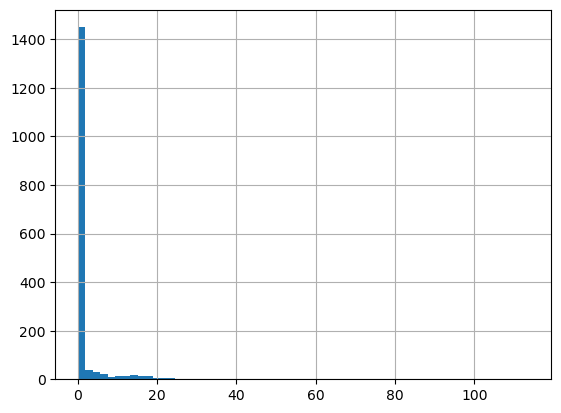

In [46]:
# We now look at the trip dance for the values
# We see mostly 0 miles here
# So we can delete these
# Confirm by looking at value counts

print(taxi_data[taxi_data['total_amount']==0]['trip_distance'].value_counts)
taxi_data[taxi_data['total_amount']==0]['trip_distance'].hist(bins=60)

<h5>Look at the very hogh total amount values</h5>

<Axes: xlabel='index', ylabel='total_amount'>

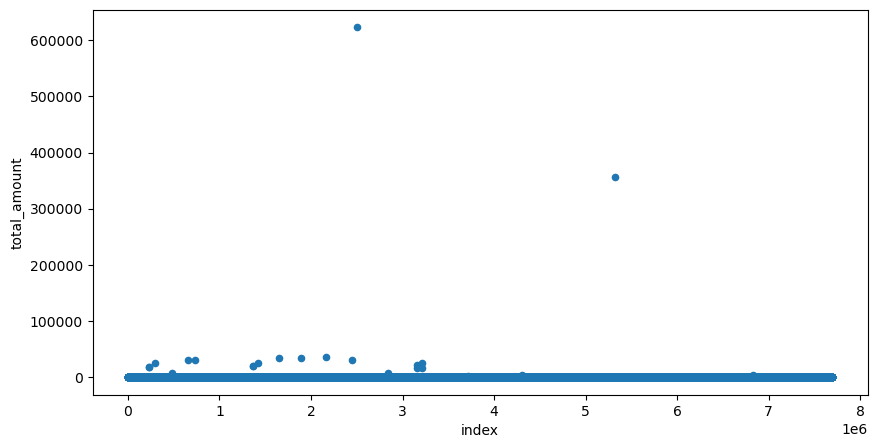

In [48]:
# Plot the values to visualize them 

taxi_data.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

In [58]:
# look at the data points that are > 500
# We see a very little < 60

# We are looking for a safe cut off point where we can ignore data from

print(taxi_data[taxi_data['total_amount']>500].shape)


# Look at values less than 500 to see if we can reduce the total amount value
# that we can cut off from 
# 200 looks like a fair cut off point

taxi_data[taxi_data['total_amount']>200].shape


(56, 9)


(1166, 9)

In [60]:
# Look at the mean amount people paid over the entire dataset
# +- $16

taxi_data['total_amount'].mean()

15.810651344610214